In [1]:
# Import libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Read spray data from csv file.
spray_df = pd.read_csv("./assets/spray.csv")

In [3]:
spray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [4]:
# Convert "Date" data type to datetime.
spray_df['Date'] = pd.to_datetime(spray_df['Date'])
spray_df['Time'] = pd.to_datetime(spray_df['Time'])

# Cost-Benefit Analysis

City of Chicago is continuing its combat against West Nile virus, even in year 2021 ([*source*](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_communities/news/2020/august/city-to-spray-insecticide-thursday-to-kill-mosquitoes.html)).

Insecticide approved by U.S. Environmental Protection Agency (EPA) is Zenivex™. It has been widely applied to control mosquitoes in outdoor residential and recreational areas. The spray will be applied by licensed mosquito abatement technicians. Zenivex has 2 formulations: Zenivex E4 and Zenivex E20.

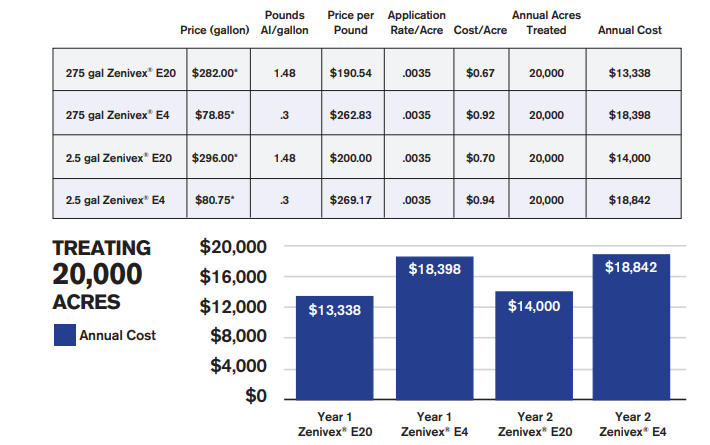

In [3]:
Image("./assets/Images/zenivex_cost.png")

According to Chicago Department of Public Health ("CDPH"), Zenivex E4 (active ingredient Etofenprox) is used.

Referring to a snapshot of 2015 Zenivex Pricing Brochure above, Zenivex E4 in year 2015 are below:
- 275 gallon: \\$0.92 per acre
- 2.5 gallon: \\$0.94 per acre

As cost of Zenivex E4 was dated in year 2015, its cost for year 2022 is expected to be a lot higher after adjusted with inflation rate from year 2016 to year 2022. ([*source*](https://www.usinflationcalculator.com/inflation/current-inflation-rates)).

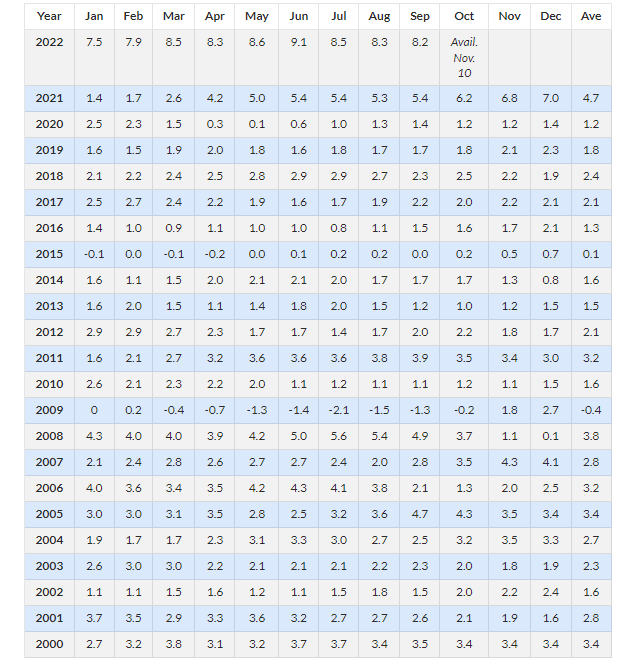

In [4]:
Image("./assets/Images/u.s_inflation_rate_year_2000_to_year_2022.png")

In [7]:
# Inflation rate from year 2016 to 2022
inflation_year_2016 = 0.013
inflation_year_2017 = 0.021
inflation_year_2018 = 0.024
inflation_year_2019 = 0.018
inflation_year_2020 = 0.012
inflation_year_2021 = 0.047
inflation_year_2022 = inflation_year_2021 # using previous year 2021 inflation as proxy

# cost of Zenivex E4 based on 275 gallon
cost_zenivex_e4_275_gallon = 0.92

zenivex_e4 = cost_zenivex_e4_275_gallon * (1+inflation_year_2016) * (1+inflation_year_2017) * (1+inflation_year_2018) * (1+inflation_year_2019) * (1+inflation_year_2020) * (1+inflation_year_2021) + (1+inflation_year_2022)
print(f"After adjusted with inflation, Zenivex E4 cost based on 275 gallon per acre is ${round(zenivex_e4, 2)}.")

After adjusted with inflation, Zenivex E4 cost based on 275 gallon per acre is $2.1.


Chicago's size is 234 square miles. ([*source*](https://mapfight.xyz/map/chicago.city)).

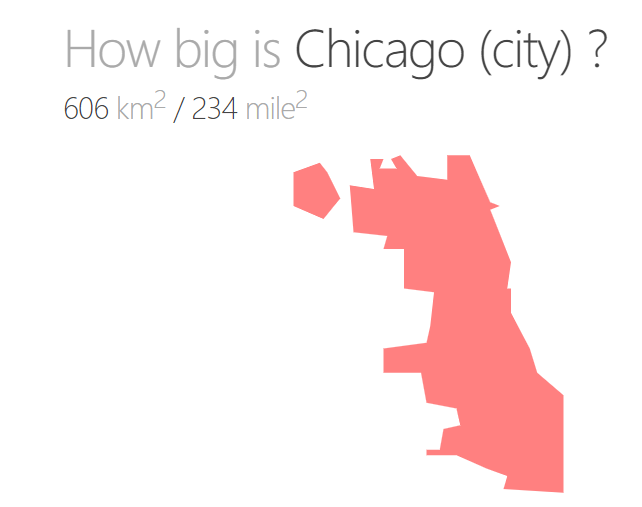

In [5]:
Image("./assets/Images/chicago_size_from_mapfight.xyz.png")

Nonetheless, according to United States Census Bureau, Chicago only has 227.63 square miles of land. This translates to 145,683 square acres.

In [9]:
# Convert square mile to acres
chicago_land_size = 227.63 * 640
print(f"Chicago land size is" ,"{:,}".format(int(chicago_land_size)), "acres.")

Chicago land size is 145,683 acres.


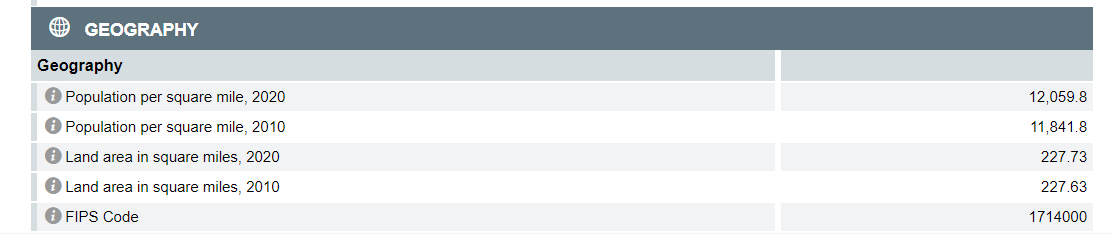

In [6]:
Image("./assets/Images/chicago_land_size.png")

Usually, CDPH uses insecticides from July to September to kill adult mosquitoes when West Nile virus-infected
mosquitoes have been detected. If CDPH is to spray whole Chicago land area twice a year, it would cost about \\$611,000 (rounded to nearest thousand).

In [11]:
# Derive spray cost.
# spray frequency = 2 assuming CDPH sprays all land area of Chicago 2 times a year.
spray_frequency = 2
spray_cost = chicago_land_size * zenivex_e4 * spray_frequency

# Round spray cost to nearest thousand.
spray_cost = int(round(spray_cost, -3))

# Print spray cost.
print(f"Cost of spraying whole Chicago land area 2 times a year is $", "{:,}".format(spray_cost))

Cost of spraying whole Chicago land area 2 times a year is $ 611,000


**Total Spray Cost vs GDP** 

Although total spray cost may look huge in dollar amount, to put thing in perspective, total spray cost is about 0.00008% of Chicago GDP in year 2020 (when Covid-19 hit), which is insignificant.

In [12]:
# Percentage of spray cost over Chicago GDP.
chicago_gdp_year_2020 = 593.97 * 1000000000
spray_over_gdp = spray_cost / chicago_gdp_year_2020
print(f"Percentage of spray cost vs reported Chicago GDP in year 2020 =", format(spray_over_gdp,'.5%'))

Percentage of spray cost vs reported Chicago GDP in year 2020 = 0.00010%


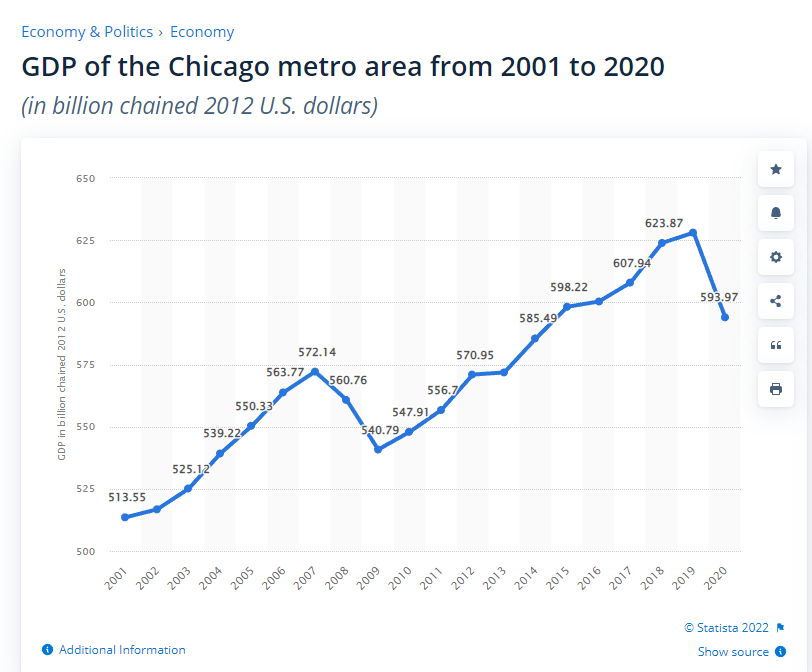

In [7]:
Image("./assets/Images/gdp_chicago.png")

**Hospitalization and Lost of Productivity**

From year 1999 to 2014, West Nile virus has cost a cumulative $778 million in healthcare expenditures and lost of productivity.

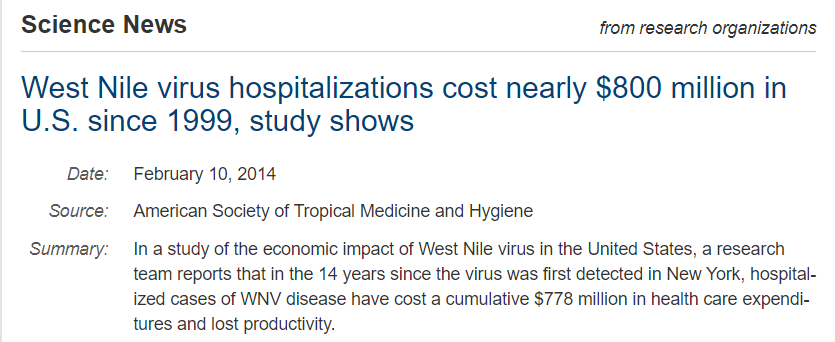

In [8]:
Image("./assets/Images/virus_total_cost_since_year_1999.png")

In year 2005, estimated inpatient cost per patient in Sacremento County, California was about $33,000 (rounded to nearest thousand). Actual cost incurred per patient in Chicago in year 2022 could be higher as this inpatient cost did not include inflation, outpatient cost and cost for long term care after patient was discharged. 

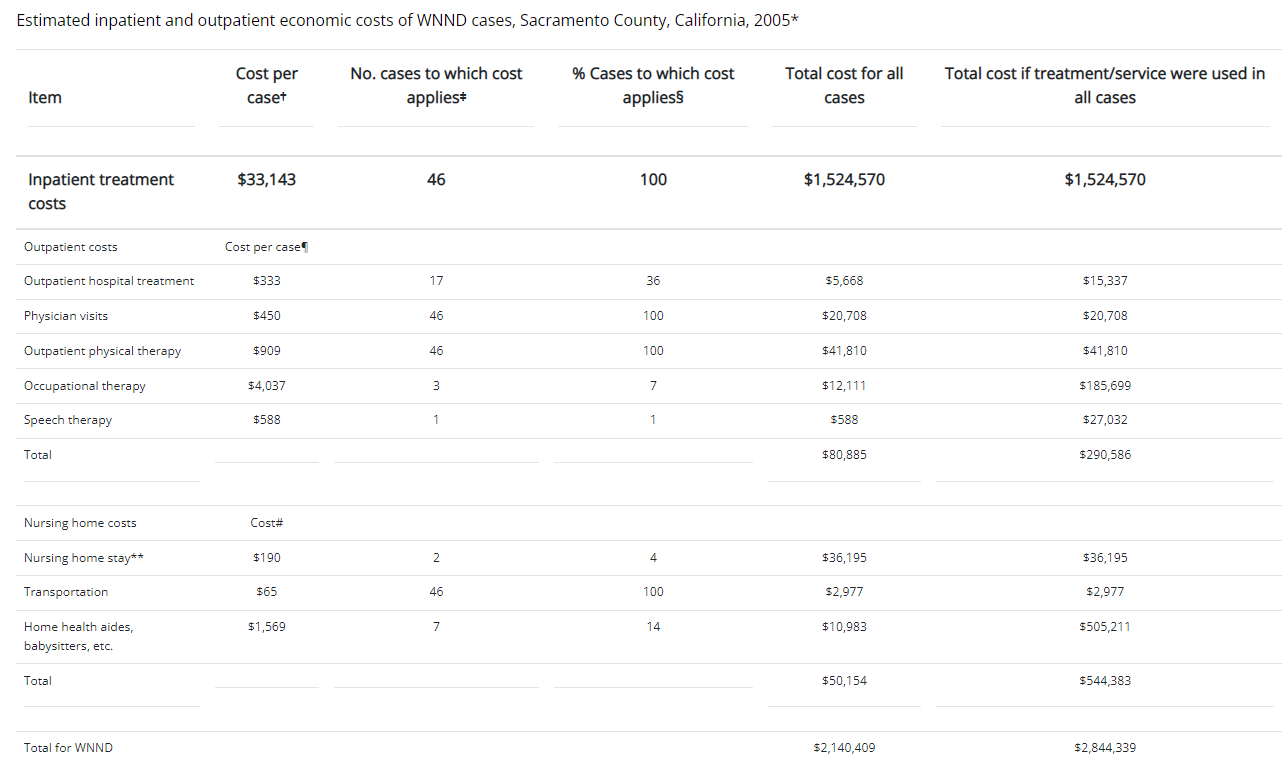

In [9]:
Image("./assets/Images/estimated_inpatient_outpatient_cost_california.png")

As of October 18, 2022, there are 26 reported cases infected with West Nile virus in Illinois, whose capital is Chicago.

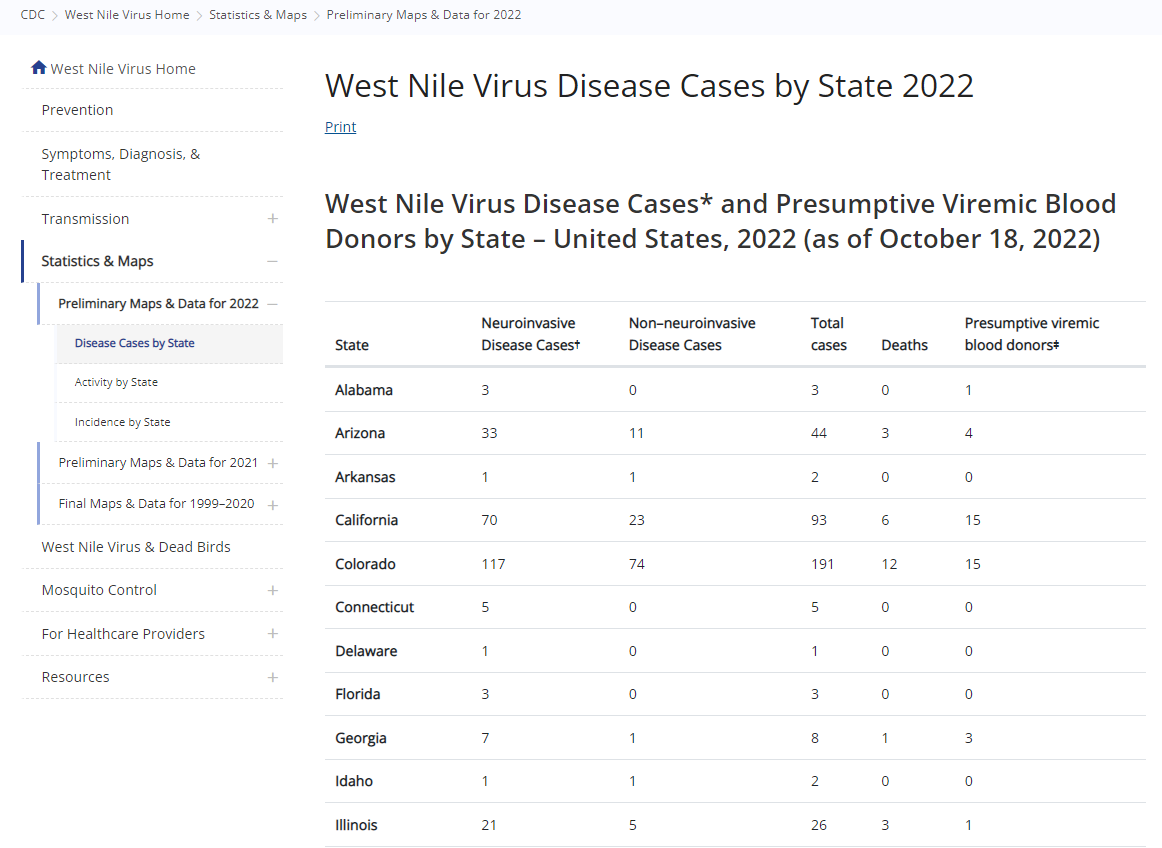

In [10]:
Image("./assets/Images/virus_statistic_year_2022.png")

Using inpatient cost per patient in Sacremento County, California as proxy, adjusted with inflation from year 2006 to year 2022, this could incur total hospitalization cost of at least $1,244,000 in Illinois.    

In [17]:
# Inflation rate from year 2006 to 2022
inflation_year_2006 = 0.032
inflation_year_2007 = 0.028
inflation_year_2008 = 0.038
inflation_year_2009 = -0.004
inflation_year_2010 = 0.016
inflation_year_2011 = 0.032
inflation_year_2012 = 0.021
inflation_year_2013 = 0.015
inflation_year_2014 = 0.016
inflation_year_2015 = 0.001
inflation_year_2016 = 0.013
inflation_year_2017 = 0.021
inflation_year_2018 = 0.024
inflation_year_2019 = 0.018
inflation_year_2020 = 0.012
inflation_year_2021 = 0.047
inflation_year_2022 = inflation_year_2021 # using previous year 2021 inflation as proxy

# Derive total hospitalization cost incurred in Illinois.
# Number of cases reported in Illinois = 26
number_of_cases = 26

# Estimated inpatient cost per patient based on Sacremento County, California, adjusted with inflation from year 2006 to 2022. 
estimated_inpatient_cost_per_patient = 33000 * (1+inflation_year_2006) * (1+inflation_year_2007) * (1+inflation_year_2008) * (1+inflation_year_2009) * (1+inflation_year_2010) * (1+inflation_year_2011) * (1+inflation_year_2012) * (1+inflation_year_2013)* (1+inflation_year_2014) * (1+inflation_year_2015) * (1+inflation_year_2016) * (1+inflation_year_2017)* (1+inflation_year_2018) * (1+inflation_year_2019) * (1+inflation_year_2020) * (1+inflation_year_2021) * (1+inflation_year_2022)
hospitalization_cost_illinois = number_of_cases * estimated_inpatient_cost_per_patient

# Round hospitalization cost to nearest thousand.
hospitalization_cost_illinois = int(round(hospitalization_cost_illinois, -3))

print(f"Estimated hospitalization costs for total 26 reported cases in Illinois = $", "{:,}".format(hospitalization_cost_illinois))

Estimated hospitalization costs for total 26 reported cases in Illinois = $ 1,244,000


In comparison, costs for treating West Nile virus infected patients alone exceeded total cost of spraying by $633,000. This suggests that for the benefit of spraying to control curb mosquitoes with West Nile virus to outweigh the cost of hospitalisation and loss of productivity due to epidemic, the spray event would need to prevent only 13 cases.

In [18]:
# Compare total spray cost vs estimated hospitalization costs.
# Difference between spray cost and hospitalization cost in illinois.
excess_cost = hospitalization_cost_illinois - spray_cost
print(f"Costs for treating West Nile virus infected patients alone > total cost of spraying = $", "{:,}".format(excess_cost))

# Ratio of total spray cost over total hospitalization cost.
ratio_spray_vs_hospitalization = spray_cost / hospitalization_cost_illinois
print(f"Ratio of total spray cost vs total hospitalization cost:", '{:,.0%}'.format(ratio_spray_vs_hospitalization))

number_of_cases_prevent = spray_cost / estimated_inpatient_cost_per_patient
print(f"Total cost incurred from spraying is equivalent to total hospitalization costs incurred by", round(number_of_cases_prevent), "cases.")

Costs for treating West Nile virus infected patients alone > total cost of spraying = $ 633,000
Ratio of total spray cost vs total hospitalization cost: 49%
Total cost incurred from spraying is equivalent to total hospitalization costs incurred by 13 cases.


## Optimising Resource Allocation

### (i) Basic Approach: Directing Resources to High WNV-Probability Areas

Assuming that the city council have finite resources to tackle an ongoing WNV crisis. A most direct is to employ the model developed in the prior section to predict the probability of an WNV outbreak for each available observation, and then direct spray efforts (or any other forms of anti-WNV measures) to these areas.

In [19]:
## Import required libraries

import pandas as pd
import numpy as np

# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for apply progress tracking
from tqdm import tqdm
tqdm.pandas()

# For modelling
from sklearn.pipeline import Pipeline
from sklearn.metrics import get_scorer, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [20]:
## Recall Production Model Developed from Modelling Section

def log_reg_model(rolling_days, drop_codesum = False):
    
    # load in data
    locals()['train_' + str(rolling_days)] = pd.read_csv('./assets/Modelling_Data/train_r'+ str(rolling_days) +'.csv', index_col=0)
    
    # drop Date Column
    locals()['train_' + str(rolling_days)].drop(columns = ['Date'], inplace = True)
    
    # drop CodeSum Column
    if drop_codesum == True:
        locals()['train_' + str(rolling_days)].drop(columns = ['MIFG','TS','SQ','GR','VCFG','FG+','SN','FG',
                                                               'VCTS','BCFG','BR','RA','FU','DZ','TSRA','HZ'], inplace = True)
    
    # Create X and Y
    X = eval('train_' + str(rolling_days)).drop(columns = ['WnvPresent'])
    X.reset_index(drop = True, inplace = True)
    y = eval('train_' + str(rolling_days))['WnvPresent']
    
    # Dummify Columns
    X = pd.get_dummies(X, columns=['Species', 'Trap'], drop_first = True)
    
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 88, stratify = y)
    
    #Standard Scale weather variables
    ct = ColumnTransformer([("sc", StandardScaler(), 
                             ['Tavg', 'PrecipTotal','StnPressure','ResultDir','AvgSpeed','Sunlight'])],
                          remainder = 'passthrough')

    X_train_sc = ct.fit_transform(X_train)
    X_test_sc = ct.transform(X_test)
    
    # Convert to dataframe
    X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
    X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)
    
    # Instantiate a pipeline
    pipe_logreg = Pipeline([
        ('logreg', LogisticRegression(tol = 0.005, class_weight='balanced', solver = 'saga', max_iter=10000, random_state = 888)) # tuple for estimator object, class
    ])
    
    # Input Search Parameters!
    pipe_logreg_params = {'logreg__C': [1000]}
    
    # Instantiate a Grid Search
    gs_logreg = GridSearchCV(pipe_logreg, 
                             param_grid=pipe_logreg_params,
                             cv=5,
                             verbose=1,
                             n_jobs=-1
                            )

    # Score!
    gs_logreg.fit(X_train_sc, y_train) # 1. fit model on training data first
    
    return(gs_logreg, X_test_sc, y_test)

In [21]:
production_model, X_test_sc, y_test = log_reg_model(30)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [22]:
# Reproduce top 10 Predictions
index_of_most_likely_cases = pd.DataFrame(production_model.best_estimator_.predict_proba(X_test_sc))[1].sort_values(ascending = False).index[0:10]

In [23]:
# Display top ten most likely observations: Resources should be directed here
X_test_sc.iloc[index_of_most_likely_cases]

Tavg  PrecipTotal  StnPressure  ResultDir  AvgSpeed  Sunlight  MIFG   TS   SQ   GR  VCFG  FG+   SN        FG  VCTS  BCFG        BR        RA   FU        DZ  TSRA        HZ  Species_CULEX PIPIENS  Species_CULEX PIPIENS/RESTUANS  Species_CULEX RESTUANS  Species_CULEX SALINARIUS  Species_CULEX TARSALIS  Species_CULEX TERRITANS  Trap_T002  Trap_T003  Trap_T004  Trap_T005  Trap_T006  Trap_T007  Trap_T008  Trap_T009  Trap_T011  Trap_T012  Trap_T013  Trap_T014  Trap_T015  Trap_T016  Trap_T017  Trap_T018  Trap_T019  Trap_T025  Trap_T027  Trap_T028  Trap_T030  Trap_T031  Trap_T033  Trap_T034  Trap_T035  Trap_T036  Trap_T037  Trap_T039  Trap_T040  Trap_T043  Trap_T044  Trap_T045  Trap_T046  Trap_T047  Trap_T048  Trap_T049  Trap_T050  Trap_T051  Trap_T054  Trap_T060  Trap_T061  Trap_T062  Trap_T063  Trap_T065  Trap_T066  Trap_T067  Trap_T069  Trap_T070  Trap_T071  Trap_T072  Trap_T073  Trap_T074  Trap_T075  Trap_T076  Trap_T077  Trap_T078  Trap_T079  Trap_T080  Trap_T081  Trap_T082  \
1058  0.114322    -0.928894     0.497700   0.428053 -0.837848 -0.547843   0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000947   0.0   0.0  0.134280  0.264773  0.0  0.065720   0.0  0.035227                    1.0                             0.0                     0.0                       0.0                     0.0                      0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0   
16   -0.414832    -0.842158     0.782727   0.590719 -0.752515 -0.213541   0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000   0.0   0.0  0.084306  0.335278  0.0  0.050972   0.0  0.031389                    0.0                             1.0                     0.0                       0.0                     0.0                      0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0   
1018 -0.414832    -0.842158     0.782727   0.590719 -0.752515 -0.213541   0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000   0.0   0.0  0.084306  0.335278  0.0  0.050972   0.0  0.031389                    1.0                             0.0                     0.0                       0.0                     0.0                      0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0   
2867 -0.349803

### (ii) Secondary Approach: Determining Intervention Threshold

In the longer run steady state however, we don't expect mass observations to be tabled to the city council at regular intervals. Observations are going to trickle in on a daily basis, and to the city council, a clear criteria must be established towards determining if intervention (spraying or other measures) would be required. In practice, this involves establishing a clear probablity threshold (higher than which consider an observation to be "WNVpresent") when classifiying our cases.

To do this, we first recognise that each False Positive and False Negative will incur "wasteful" costs (1) Each False Positive involves incurring the cost of preventive measures (such as spraying) when WNV will not actually happen, and (2) Each False Positive (assuming that the WNV case would have been prevented with the preventive measures) involves incurring the hefty medical and loss of productive hours arising from a WNV positive case. (Meanwhile, accurate predictions i.e. True Positives and True Negatives are considered as "money well spent", where resources have / have not been directed to areas needing them / not needing them).

In order to proceed, **we make an assumption that the cost of incurring a False Negative outweighs the cost of a False Positive by 50 times to 1**. While arbitrary, we opine this a realistic estimate, with cost associated with WNV case (estimated to be in excess of $50,000 per case, not inclusive of opportunity costs) easily far outweighs the cost of intervention measures (spray costs and public education campaigns). 

This assumption establishes how far are we willing to tolerate a False Negative Case vis-a-vis a False Positive Case, i.e. a False Negative case is 50 times less bearable than False Positive case. This means that we are looking to find a threshold whereby the number of False Negative will be 50 times lower than that of the number of False Positives.

We code a loop to find this threshold.

In [24]:
thresholds = []
FN =[]
FP =[]
FN_to_FP = []

for threshold in tqdm(np.linspace(0, 1, 100001)):
    # This gives us the predicted class based on our threshold, in 0s and 1s
    y_pred = (pd.DataFrame(production_model.best_estimator_.predict_proba(X_test_sc))[1]> threshold).astype(float)
    
    # We compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Extract the percentage of cases which are False Negatives and False Postives, and prepare a dataframe
    FN_proportion = cm[1][0]
    FP_proportion = cm[0][1]
    
    # Added this to ensure we do not run into zero division issues
    if FP_proportion == 0:
        FN_to_FP_ratio = 10000
    else:
        FN_to_FP_ratio = FN_proportion/FP_proportion
    
    # Export the data
    thresholds.append(threshold)
    FN.append(FN_proportion)
    FP.append(FP_proportion)
    FN_to_FP.append(FN_to_FP_ratio)

100%|██████████████████████████████████| 100001/100001 [03:02<00:00, 548.50it/s]


In [25]:
## Generate dataframe
threshold_tables = pd.DataFrame([thresholds,FN,FP,FN_to_FP]).T
threshold_tables.rename(columns = {0:'Threshold',1:'FN', 2:'FP', 3:'FN FP Ratio'}, inplace = True)
threshold_tables.head()

Threshold   FN      FP  FN FP Ratio
0    0.00000  0.0  3285.0          0.0
1    0.00001  0.0  3262.0          0.0
2    0.00002  0.0  3252.0          0.0
3    0.00003  0.0  3243.0          0.0
4    0.00004  0.0  3236.0          0.0

We note that at a FN to FP ratio of 0.02 (i.e. FP being 50 times more bearable than a FN), the ideal threshold is about 0.35.

This implies that for future observations fitted into our production model, the city council will intervene when the predicted probability exceed 0.35!

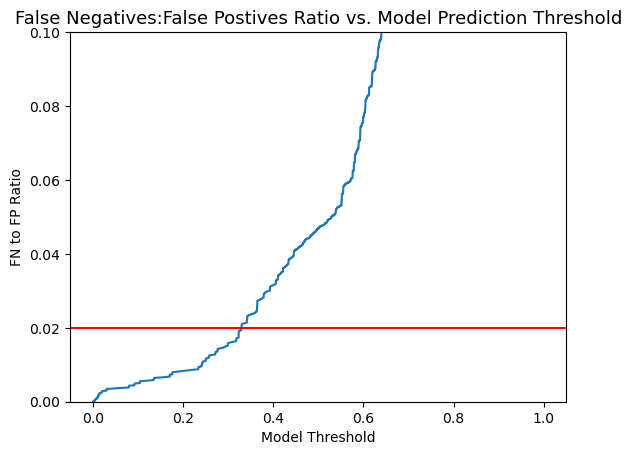

In [26]:
## Plot threshold against FN to FP Ratio
plt.plot(threshold_tables['Threshold'],threshold_tables['FN FP Ratio'])
plt.ylim(0,0.1)
plt.xlabel("Model Threshold")
plt.ylabel("FN to FP Ratio")
plt.axhline(y = 0.02, color = 'r', label = 'axvline - full height')
plt.title("False Negatives:False Postives Ratio vs. Model Prediction Threshold", size =13)
plt.show();

And there we have it - an actionable model with dummy instructions for the city council to follow! 

Of course, the robustness and cost efficiency of such an action plan fundamentally depends on the quality of the model produced. With an AUC of 0.83, we opine that this action plan to be a pretty robust one.

/Users/angjunsiong/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


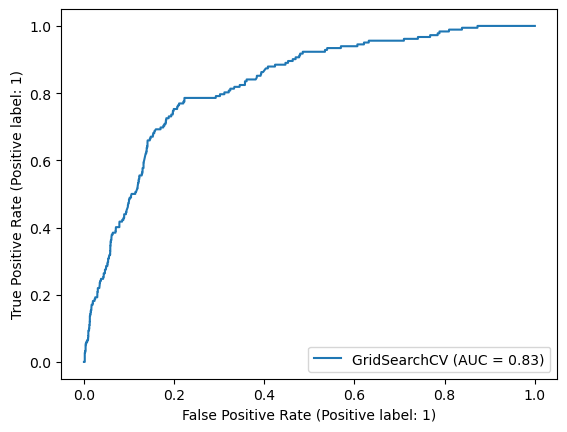

In [27]:
# Recall plot of ROC Curve - Pretty decent AUC!
plot_roc_curve(production_model, X_test_sc, y_test)
plt.show();